In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

1

In [11]:
def grad_cos(x):
    x = x.clone()
    x.requires_grad_(True)
    
    f = torch.max(torch.abs(x))
    f.backward()
    return x.grad
grad_cos(torch.tensor([1.,2.,3.]))

tensor([0., 0., 1.])

3

In [93]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.colors

In [94]:
phi = np.linspace(0, 20, 300)
r = 1 + phi

x = r * np.cos(phi)
y = r * np.sin(phi)
classes = np.zeros(300)
classes[:100] = 0
classes[100:200] = 1
classes[200:] = 2
points = np.column_stack((x + np.random.normal(scale=0.3,size = x.size), y + np.random.normal(scale=0.3,size=y.size)))

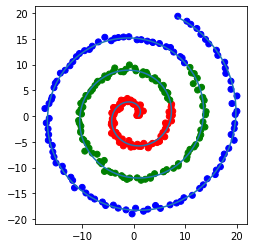

In [95]:
plt.plot(x,y)
plt.scatter(points[:,0], points[:,1], c=classes, cmap=matplotlib.colors.ListedColormap(['r','g','b']))
plt.gca().set_aspect('equal')

In [96]:
points_train, points_test, classes_train, classes_test = train_test_split(points,classes, test_size=0.2)

In [97]:
points_train, points_test = [torch.from_numpy(points_train).type(torch.FloatTensor), torch.from_numpy(points_test).type(torch.FloatTensor)]

In [98]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.relu1 = nn.ReLU() 
        
        self.fc2 = nn.Linear(10, 10)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(10, 3)
        
    def forward(self, x):
        x = x.view(-1 , 2)
        x = self.fc1(x)
        x = self.relu1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        
        x = self.fc3(x)
        
        return F.log_softmax(x, dim=1)

In [99]:
net = Net()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

for epoch in range(10):
    for i in range(len(points_train)):
        data = points_train[i]
        X = torch.tensor([data[0] ,data[1]])
        y = torch.tensor([classes_train[i]]).to(torch.long)
        net.zero_grad() 
        output = (net(X))
        
        loss = F.nll_loss(output, y)
        #print(y, output, loss)
        loss.backward()
        optimizer.step()
    #print(loss)
    
correct = 0
total = 0
with torch.no_grad():
    for i in range(len(points_train)):
        data = points_train[i]
        X = torch.tensor([data[0] ,data[1]])
        y = torch.tensor([classes_train[i]])
        output = (net(X))
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.971


In [125]:
x = r * np.cos(phi)
y = r * np.sin(phi)
x1_min, x1_max = x.min()-0.5, x.max()+0.5
x2_min, x2_max = y.min()-0.5, y.max()+0.5
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1)])
X_pred

array([[-18.80532042, -17.23492939],
       [-18.02007204, -17.23492939],
       [-17.23482366, -17.23492939],
       ...,
       [ 18.1013535 ,  20.3656898 ],
       [ 18.88660188,  20.3656898 ],
       [ 19.67185027,  20.3656898 ]])

In [126]:
y_pred = net(torch.tensor(X_pred).to(torch.float))
y_pred

tensor([[-1.2507e+01, -2.8201e+00, -6.1457e-02],
        [-1.2081e+01, -2.7016e+00, -6.9460e-02],
        [-1.1656e+01, -2.5842e+00, -7.8466e-02],
        ...,
        [-2.5482e+01, -5.4170e+00, -4.4503e-03],
        [-2.5779e+01, -5.4802e+00, -4.1773e-03],
        [-2.6076e+01, -5.5434e+00, -3.9210e-03]],
       grad_fn=<LogSoftmaxBackward0>)

In [127]:
y_pred = y_pred.detach().numpy()
y_pred

array([[-1.2506816e+01, -2.8200538e+00, -6.1456777e-02],
       [-1.2080738e+01, -2.7016156e+00, -6.9460139e-02],
       [-1.1655661e+01, -2.5841787e+00, -7.8466177e-02],
       ...,
       [-2.5481779e+01, -5.4170065e+00, -4.4502984e-03],
       [-2.5778919e+01, -5.4801903e+00, -4.1772970e-03],
       [-2.6076080e+01, -5.5433908e+00, -3.9209644e-03]], dtype=float32)

In [128]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

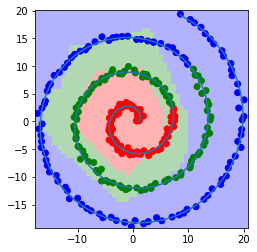

In [133]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto',cmap=matplotlib.colors.ListedColormap(['r','g','b']))
plt.plot(x,y)
plt.scatter(points[:,0], points[:,1], c=classes, cmap=matplotlib.colors.ListedColormap(['r','g','b']))
plt.gca().set_aspect('equal')

5

In [4]:
import os
print(os.listdir("input"))

['resnet_data', 'seg_pred', 'seg_test', 'seg_train']


In [5]:
os.chdir("input")


In [6]:
os.listdir()

['resnet_data', 'seg_pred', 'seg_test', 'seg_train']

In [7]:
import torch
from torch import nn
from torchvision import datasets, models, transforms

In [8]:
data_path_format = '../input/seg_{0}'

In [9]:
np.random.seed(5315)
torch.manual_seed(9784)

In [10]:
channel_means = (0.485, 0.456, 0.406)
channel_stds = (0.229, 0.224, 0.225)

In [11]:
image_transforms = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.ToTensor(),
    transforms.Normalize(channel_means, channel_stds)
])

In [12]:
image_datasets = dict(zip(('dev', 'test'), [datasets.ImageFolder(data_path_format.format(key),transform=image_transforms) for key in ['train', 'test']]))
print(image_datasets)

{'dev': Dataset ImageFolder
    Number of datapoints: 14034
    Root location: ../input/seg_train
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           ), 'test': Dataset ImageFolder
    Number of datapoints: 3000
    Root location: ../input/seg_test
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           )}


In [13]:
devset_indices = np.arange(len(image_datasets['dev']))
devset_labels = image_datasets['dev'].targets

In [14]:
from sklearn import model_selection

In [15]:
train_indices, val_indices, train_labels,  val_labels = model_selection.train_test_split(devset_indices, devset_labels, test_size=0.1, stratify=devset_labels)

In [16]:
import torch.utils.data as tdata

In [17]:
image_datasets['train'] = tdata.Subset(image_datasets['dev'], train_indices)
image_datasets['validation'] = tdata.Subset(image_datasets['dev'], val_indices)

In [18]:
print(image_datasets)

{'dev': Dataset ImageFolder
    Number of datapoints: 14034
    Root location: ../input/seg_train
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           ), 'test': Dataset ImageFolder
    Number of datapoints: 3000
    Root location: ../input/seg_test
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
           ), 'train': <torch.utils.data.dataset.Subset object at 0x000001F1FA3BC190>, 'validation': <torch.utils.data.dataset.Subset object at 0x000001F1FA360C40>}


In [19]:
from IPython.display import display

In [20]:
image_dataloaders = {key: tdata.DataLoader(image_datasets[key], batch_size=16,shuffle=True) for key in  ['train', 'validation']}

In [21]:
image_dataloaders['test'] = tdata.DataLoader(image_datasets['test'], batch_size=32)

In [22]:
def imshow(inp, title=None, fig_size=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0)) # C x H x W  # H x W x C
    inp = channel_stds * inp + channel_means
    inp = np.clip(inp, 0, 1)
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_subplot(111)
    ax.imshow(inp)
    if title is not None:
        ax.set_title(title)
    ax.set_aspect('equal')
    plt.pause(0.001)  

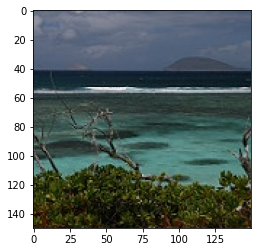

In [23]:
imshow(image_datasets['train'][8555][0])

In [24]:
cuda_device = torch.device('cuda')
cpu_device = torch.device('cpu')
device = cpu_device

In [25]:
import torch.nn as nn

In [26]:
import torch.nn as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 50, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(50, 100, 3)
        self.relu1 = F.ReLU()
        self.pool2 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(100, 50, 3)
        self.relu5 = F.ReLU()
        self.conv4 = nn.Conv2d(50, 50, 3)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.relu6 = F.ReLU()
        self.fc1 = nn.Linear(50 * 15 * 15, 150)
        self.relu2 = F.ReLU()
        self.fc2 = nn.Linear(150, 84)
        self.relu3 = F.ReLU()
        self.fc3 = nn.Linear(84, 6)
        self.relu4 = F.ReLU()
    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = self.relu1(self.pool2(self.conv2(x)))
        x = self.relu5(self.pool3(self.conv3(x)))
        x = self.relu6(self.conv4(x))
        #print(x.size(0),x.size(1),x.size(2),x.size(3))
        #x = x.view(16, -1, 6,  150)
        x = x.view(x.size(0), 50 * 15 * 15)
        x = self.relu2(self.fc1(x))
        x = self.relu3(self.fc2(x))
        x = self.fc3(x)
        return x

In [27]:
ptr = Net()
  
    
    
ptr = ptr.to(device)

In [28]:
class BestModel:
    def __init__(self, path, initial_criterion):
        self.path = path
        self.criterion = initial_criterion
        
    def update(self, model, optimizer, criterion):
        self.criterion = criterion
        torch.save({'model_state': model.state_dict(), 'optimizer_state': optimizer.state_dict(), 'criterion': criterion}, self.path)
        
    def load_model_data(self):
        return torch.load(self.path)
    
    def restore(self, model, optimizer):
        model_data = self.load_model_data()
        model.load_state_dict(model_data['model_state'])
        optimizer.load_state_dict(model_data['optimizer_state'])

In [29]:
def train_model(epochs, model, optimizer, criterion, loaders, device, best_model, n_prints=1):
    print_every = len(loaders['train']) // n_prints
    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        
        for iteration, (xx, yy) in enumerate(loaders['train']):
            optimizer.zero_grad()
            xx, yy = xx.to(device), yy.to(device)
            out = model(xx)
            loss = criterion(out, yy)
            running_train_loss += loss.item()
            loss.backward()
            optimizer.step()
            
            if(iteration % print_every == print_every - 1):
                running_train_loss /= print_every
                print(f"Epoch {epoch}, iteration {iteration} training_loss {running_train_loss}")
                running_train_loss = 0.0
            
        with torch.no_grad():
            model.eval()
            running_corrects = 0
            running_total = 0
            running_loss = 0.0
            for xx, yy in loaders['validation']:
                batch_size = xx.size(0)
                xx, yy = xx.to(device), yy.to(device)

                out = model(xx)
                
                loss = criterion(out, yy)
                running_loss += loss.item()
                
                predictions = out.argmax(1)
                running_corrects += (predictions == yy).sum().item()
                running_total += batch_size
            
            mean_val_loss = running_loss / len(loaders['validation'])
            accuracy = running_corrects / running_total
            
            if accuracy > best_model.criterion:
                best_model.update(model, optimizer, accuracy)
            
            print(f"Epoch {epoch}, val_loss {mean_val_loss}, accuracy = {accuracy}")
    best_model.restore(model, optimizer)

In [30]:
import time
start = time.time()

In [31]:
optimizer = torch.optim.Adam(ptr.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()
best_model = BestModel('resnet_data',0.0)
train_model(5, ptr, optimizer, criterion,image_dataloaders, device, best_model=best_model, n_prints=5)

Epoch 0, iteration 157 training_loss 1.2819840342183657
Epoch 0, iteration 315 training_loss 1.0278345974563043
Epoch 0, iteration 473 training_loss 0.9086547367557695
Epoch 0, iteration 631 training_loss 0.858958825469017
Epoch 0, iteration 789 training_loss 0.7822501059574417
Epoch 0, val_loss 0.7922903407703746, accuracy = 0.6737891737891738
Epoch 1, iteration 157 training_loss 0.7450245524509044
Epoch 1, iteration 315 training_loss 0.6805087906084483
Epoch 1, iteration 473 training_loss 0.6179369287211683
Epoch 1, iteration 631 training_loss 0.6351070506851885
Epoch 1, iteration 789 training_loss 0.5964368172461474
Epoch 1, val_loss 0.6146932103755799, accuracy = 0.7841880341880342
Epoch 2, iteration 157 training_loss 0.5612230246202855
Epoch 2, iteration 315 training_loss 0.5167955236533021
Epoch 2, iteration 473 training_loss 0.5094828897073299
Epoch 2, iteration 631 training_loss 0.5306640145710751
Epoch 2, iteration 789 training_loss 0.4881004512875895
Epoch 2, val_loss 0.52258

In [32]:
end = time.time()
print(end - start)

3046.63174033165


In [33]:
from torchvision.utils import make_grid

In [34]:
xx, yy = next(iter(image_dataloaders['validation']))

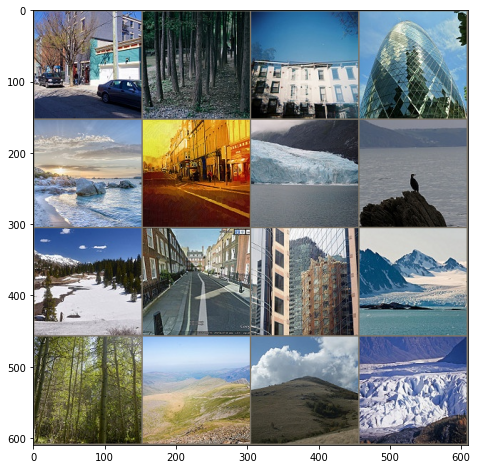

['street', 'forest', 'buildings', 'mountain', 'sea', 'street', 'glacier', 'sea', 'mountain', 'street', 'buildings', 'glacier', 'forest', 'sea', 'mountain', 'mountain']
['street', 'forest', 'buildings', 'buildings', 'sea', 'street', 'glacier', 'sea', 'mountain', 'street', 'buildings', 'glacier', 'forest', 'mountain', 'mountain', 'glacier']


In [35]:
ptr.eval()
out = ptr(xx.cpu())
preds = out.argmax(1)
predicted_classes = [image_datasets['dev'].classes[c] for c in preds]
actual_classes = [image_datasets['dev'].classes[c] for c in yy]
imshow(make_grid(xx, nrow=4), fig_size=(8,8))
print(predicted_classes)
print(actual_classes)

In [36]:
all_preds = []
correct_preds = []
with torch.no_grad():
    ptr.eval()
    for xx, yy in image_dataloaders['test']:
        xx = xx.to(device)
        output = ptr(xx)
        all_preds.extend(output.argmax(1).tolist())
        correct_preds.extend(yy.tolist())

In [37]:
from sklearn import metrics

In [38]:
all_preds = np.asarray(all_preds)
correct_preds = np.asarray(correct_preds)

In [39]:
target_names = image_datasets['test'].classes
print(metrics.classification_report(correct_preds, all_preds,target_names=target_names))

              precision    recall  f1-score   support

   buildings       0.75      0.83      0.79       437
      forest       0.90      0.97      0.93       474
     glacier       0.86      0.68      0.76       553
    mountain       0.74      0.84      0.79       525
         sea       0.83      0.81      0.82       510
      street       0.85      0.82      0.84       501

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



In [40]:
confusion_matrix = metrics.confusion_matrix(correct_preds, all_preds)
pd.DataFrame(confusion_matrix, index=target_names, columns=target_names)

,buildings,forest,glacier,mountain,sea,street
buildings,362,10,2,6,5,52
forest,1,460,0,4,2,7
glacier,17,6,374,118,34,4
mountain,12,6,28,442,36,1
sea,31,6,26,28,413,6
street,59,22,3,1,5,411
